<a href="https://colab.research.google.com/github/PeaceOfGod/Hamoye-Practice-Exercises/blob/master/Regression_Energy_Efficiency_of_Buildings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression.py

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as mlt
import numpy as np
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls '/content/gdrive/My Drive/Datasets for Hamoye Data Science Internship'

ENB2012_data.xlsx  energydata_complete.csv


In [4]:
df = pd.read_excel('/content/gdrive/My Drive/Datasets for Hamoye Data Science Internship/ENB2012_data.xlsx')

In [5]:
column_names = {'X1':'Relative_Compactness', 'X2':'Surface_Area',
                'X3':'Wall_Area', 'X4':'Roof_Area', 'X5':'Overall_Height',
                'X6':'Orientation', 'X7':'Glazing_Area',
                'X8':'Glazing_Area_Distribution',
                'Y1': 'Heating_Load', 'Y2':'Cooling_Load'}

In [6]:
df = df.rename(columns=column_names)

In [7]:
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

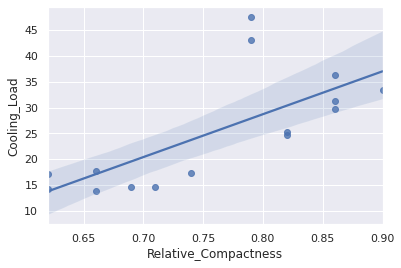

In [8]:
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

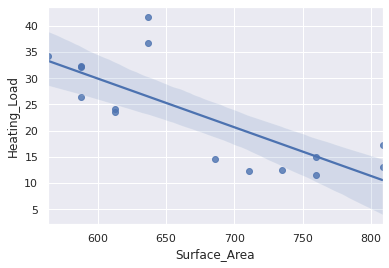

In [9]:
simple_linear_reg_df2 = df[['Surface_Area', 'Heating_Load']].sample(15, random_state=2)
sns.regplot(x="Surface_Area", y="Heating_Load", data=simple_linear_reg_df2)

Mean Absolute Error.py

In [10]:
#Normalize the dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
features_df = normalised_df.drop(columns = ['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [11]:
#Split dataset into the training and testing dataset.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state = 1)

In [12]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#Fit the model to the training dataset
linear_model.fit(x_train, y_train)
#Obtain predictions
predicted_values = linear_model.predict(x_test)


#MAE

In [14]:
  from sklearn.metrics import mean_absolute_error
  mae = mean_absolute_error(y_test, predicted_values)
  round(mae, 3)

  #The less the Mean Absolute Error, the better the model. When MAE = 0, the model is perfect.

0.063

R-Squared.py

In [15]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predicted_values)
round(r_squared, 3)

0.893

Residual Sum of Squares.py

In [17]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.823

Root Mean Square Error.py

In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

Comparing the effects of regularization.py

In [28]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [33]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000


Feature Selection and Lasso Regression.py

In [32]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge Regression.py

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)